## Problem Statement

**Understanding the problem statement is the first and foremost step. This would help us give an
intuition of what we will face ahead of time. Let us see the problem statement -**

***Dream Housing Finance company deals in all home loans. They have presence across all urban,
semi urban and rural areas. Customer first apply for home loan after that company validates
the customer eligibility for loan. Company wants to automate the loan eligibility process (real
time) based on customer detail provided while filling online application form. These details are
Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit
History and others. To automate this process,they have given a problem to identify the
customers segments,those are eligible for loan amount so thatthey can specifically target
these customers.***

It is a classification problem where we have to predict whether a loan would be approved or not.
In a classification problem, we have to predict discrete values based on a given set of
independent variable(s). Classification can be of two types:
- **Binary Classification :** In this classification we have to predict either of the two given
classes. For example: classifying the gender as male or female, predicting the result as win
or loss, etc.
- **Multiclass Classification :** Here we have to classify the data into three or more classes. For
example: classifying a movie's genre as comedy, action or romantic, classify fruits as
oranges, apples, or pears, etc.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its
lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.


## Hypothesis Generation

After looking at the problem statement, we will now move into hypothesis generation. It is the
process of listing out all the possible factors that can affect the outcome.

**What is hypothesis generation?**

This is a very important stage in any data science/machine learning pipeline. It involves
understanding the problem in detail by brainstorming as many factors as possible which can
impact the outcome. It is done by understanding the problem statement thoroughly and before
looking at the data.
Below are some of the factors which I think can affect the Loan Approval (dependent variable for
this loan prediction problem):
- **Salary:** Applicants with high income should have more chances of loan approval.
- **Previous history:** Applicants who have repayed their previous debts should have higher
chances of loan approval.
- **Loan amount:** Loan approval should also depend on the loan amount. If the loan amount is
less, chances of loan approval should be high.
- **Loan term:** Loan for less time period and less amount should have higher chances of
approval.
- **EMI:** Lesser the amount to be paid monthly to repay the loan, higher the chances of loan
approval.
These are some of the factors which i think can affect the target variable.

### Loading Packages

In [1]:
import pandas as pd 
import numpy as np # for mathematics calculations
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # data visualization

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings     # to ignore any warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.precision", 2)

### Reading Data

For this practice problem, we have been given three CSV files: train, test and sample submission.
- Train file will be used for training the model, i.e. our model will learn from this file. It
contains all the independent variables and the target variable.
- Test file contains all the independent variables, but not the target variable. We will apply
the model to predict the target variable for the test data.
- Sample submission file contains the format in which we have to submit our predictions.

In [2]:
train = pd.read_csv('train.csv')  # train dataset
test = pd.read_csv('test.csv')    # test dataset

Let’s make a copy of train and test data so that even if we have to make any changes in these
datasets we would not lose the original datasets

In [3]:
train_og = train.copy()
test_og = test.copy()

### Understanding Data

we will look at the structure of the train and test datasets. Firstly, we will check
the features present in our data and then we will look at their data types.

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset.
Let’s also have a look at the columns of test dataset.

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. We will
predict the Loan_Status using the model built using the train data.

**Given below is the description for each variable**

| Variable | Descriptions |
| :- | -: |
| Loan_ID | Unique Loan ID | 
| Gender | Male/Female |
| Married | Applicant Married(Y/N) |
| Dependents | Number of Dependents |
| Education | Application Education(Graduate / Under Graduate) |
| Self_Employed | Self_Employed (Y/N) |
| ApplicantIncome | Applicant Income |
| CoapplicantIncome | Coapplicant Income |
| LoanAmount | Loan Amount thousands |
| Loan_Amount_Term | Term of loan in months |
| Credit_History | Credit History meets guidlines |
| Property_Area | Urban/ Semi Urban/ Rural |
| Loan_Status | Loan Approved(Y/N) |

In [6]:
# print data types of independent variables
train.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**We can see there are three format of data types:**
+ **object:** Object format means variables are categorical. Categorical variables in our dataset
are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area,
Loan_Status
+ **int64:** It represents the integer variables. ApplicantIncome is of this format.
+ **float64:** It represents the variable which have some decimal values involved. They are also
numerical variables. Numerical variables in our dataset are: CoapplicantIncome,
LoanAmount, Loan_Amount_Term, and Credit_History

**Let’s look at the shape of the dataset.**

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

**We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test
dataset.**

In [8]:
# now generates the descriptive statistics of train datasets
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [9]:
# let's see descriptive statistics of non-numerical features
train.describe(include=['object','bool'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001644,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## Univariate Analysis

Now, we will do univariate analysis. It is the simplest form of analyzing data where we
examine each variable individually. For categorical features we can use frequency table or bar
plots which will calculate the number of each category in a particular variable. For numerical
features, probability density plots can be used to look at the distribution of the variable.

**Target Variable**

We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look
at its frequency table, percentage distribution and bar plot.
Frequency table of a variable will give us the count of each category in that variable.

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
### Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.69
N    0.31
Name: Loan_Status, dtype: float64

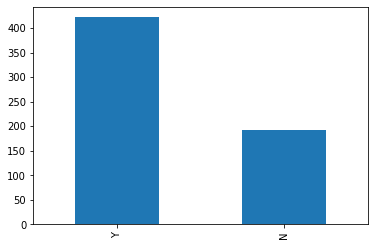

In [12]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

The loan of 422(around 69%) people out of 614 was approved.

### Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.
- **Categorical features:** These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
- **Ordinal features:** Variables in categorical features having some order involved (Dependents, Education, Property_Area)
- **Numerical features:** These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

### Let’s visualize the categorical and ordinal features first.

#### Independent Variable (Categorical)

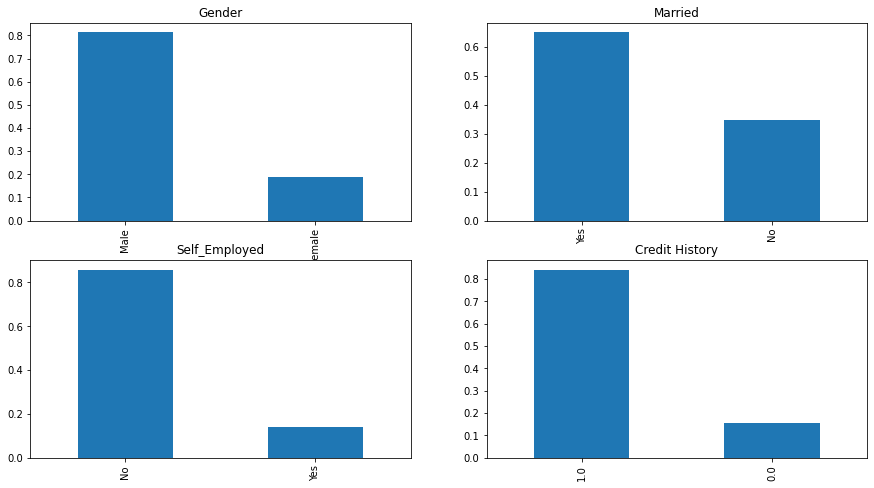

In [13]:
_,axes = plt.subplots(2,2,figsize=(15,8))

train['Gender'].value_counts(normalize=True).plot(kind='bar',ax=axes[0,0],title='Gender')

train['Married'].value_counts(normalize=True).plot(kind='bar',ax=axes[0,1],title='Married')

train['Self_Employed'].value_counts(normalize=True).plot(kind='bar',ax=axes[1,0],title='Self_Employed')

train['Credit_History'].value_counts(normalize=True).plot(kind='bar',ax=axes[1,1],title='Credit History')
plt.show()

**It can be inferred from the above bar plots that:**
- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.**

#### Independent Variable (Ordinal)

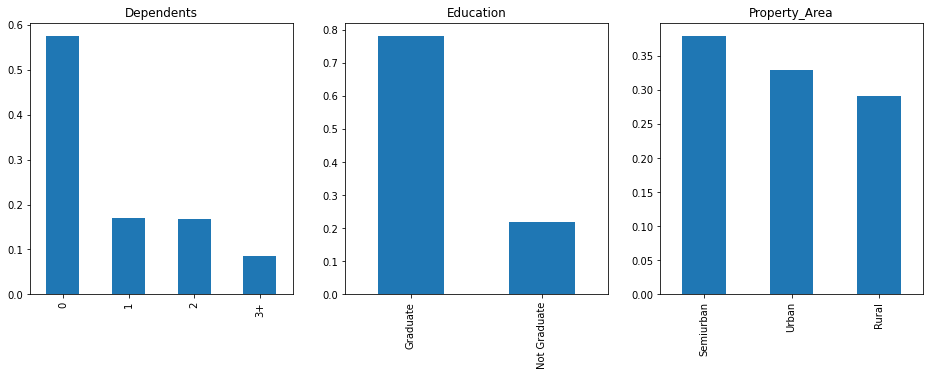

In [14]:
_,axes = plt.subplots(1,3,figsize=(16,5))

train['Dependents'].value_counts(normalize=True).plot.bar(ax = axes[0],title= 'Dependents')

train['Education'].value_counts(normalize=True).plot.bar(ax = axes[1],title='Education')

train['Property_Area'].value_counts(normalize=True).plot.bar(ax=axes[2],title='Property_Area')
plt.show()

**Following inferences can be made from the above bar plots:**
- Most of the applicants don’t have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.

#### Independent Variable (Numerical)

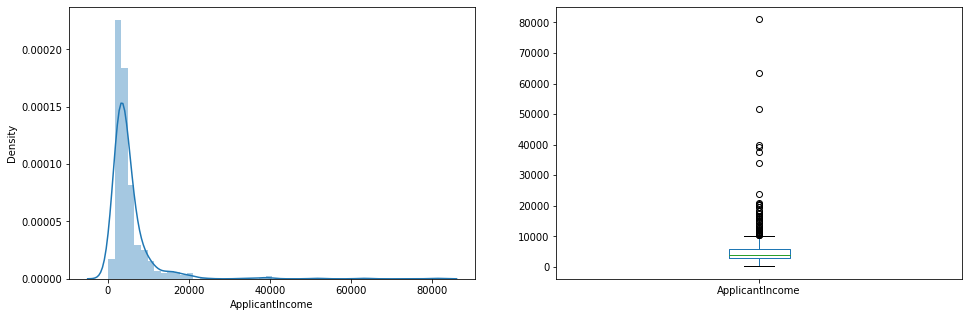

In [15]:
_,axes = plt.subplots(1,2,figsize=(16,5))

sns.distplot(train['ApplicantIncome'],ax = axes[0]);

train['ApplicantIncome'].plot.box(ax = axes[1])
plt.show()

**It can be inferred that most of the data in the distribution of applicant income is towards left
which means it is not normally distributed.**

**The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to
the income disparity in the society. Part of this can be driven by the fact that we are looking at
people with different education levels. Let us segregate them by Education:**

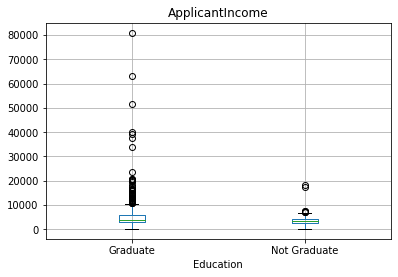

In [16]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")
plt.show()

**We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.**

**Let’s look at the Coapplicant income distribution.**

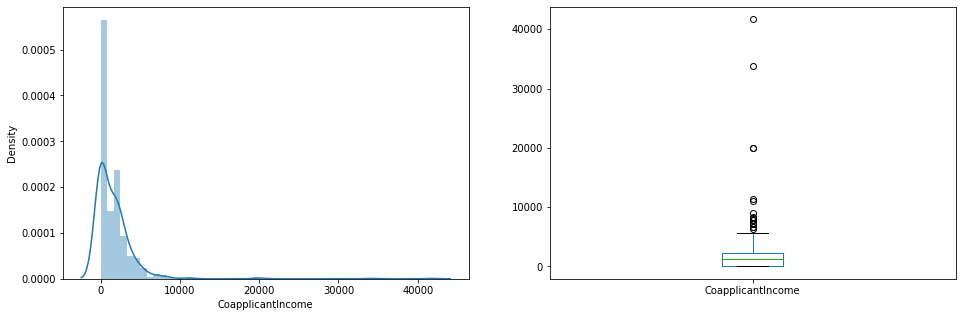

In [17]:
_,axes = plt.subplots(1,2,figsize=(16,5))
sns.distplot(train['CoapplicantIncome'],ax=axes[0]);

train['CoapplicantIncome'].plot.box(ax=axes[1])
plt.show()

**We see a similar distribution as that of the applicant income. Majority of coapplicant’s income
ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not
normally distributed.**

**Let’s look at the distribution of LoanAmount variable**

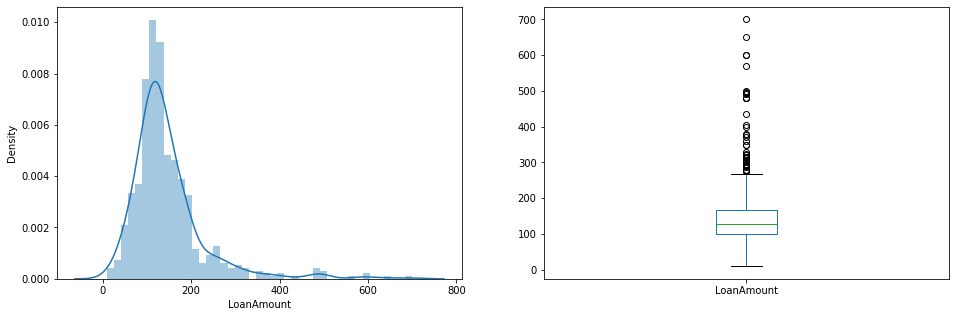

In [18]:
_,axes = plt.subplots(1,2,figsize=(16,5))

sns.distplot(train['LoanAmount'],ax=axes[0]); 

train['LoanAmount'].plot.box(ax=axes[1])
plt.show()

**We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the
outliers in later sections.**

**Now we would like to know how well each feature correlate with Loan Status.**

### Bivariate Analysis

**Lets recall some of the hypotheses that we generated earlier:**
- Applicants with high income should have more chances of loan approval.
- Applicants who have repaid their previous debts should have higher chances of loan approval.
- Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval

**Lets try to test the above mentioned hypotheses using bivariate analysis
After looking at every variable individually in univariate analysis, we will now explore them again
with respect to the target variable.**

### Categorical Independent Variable vs Target Variable

**First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved
and unapproved loans.**

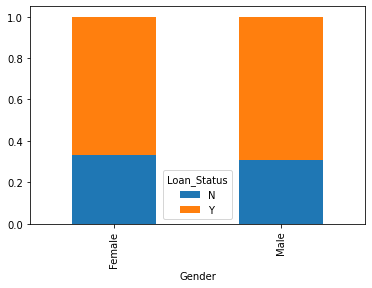

In [19]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(6,4))
plt.show()

**It can be inferred that the proportion of male and female applicants is more or less same for both
approved and unapproved loans. Now let us visualize the remaining categorical variables vs target variable**

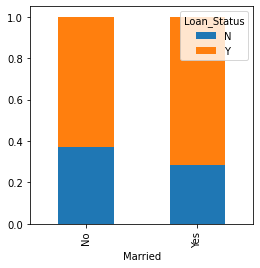

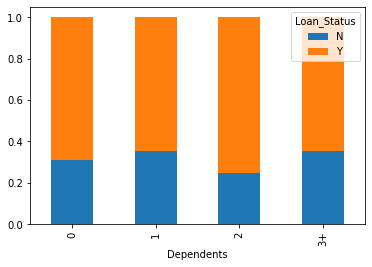

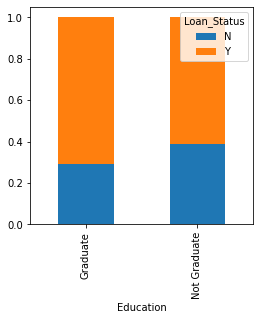

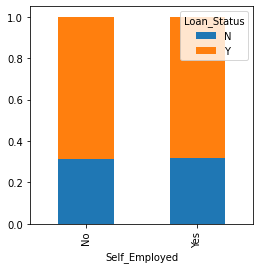

In [20]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])

Education=pd.crosstab(train['Education'],train['Loan_Status'])

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4)) 

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) 

Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of **Loan_Status.**
- Graduate application is higher for the approved loans.
- There is nothing significant we can infer from **Self_Employed vs Loan_Status plot.**

**Now we will look at the relationship between remaining categorical independent variables and
Loan_Status.**`

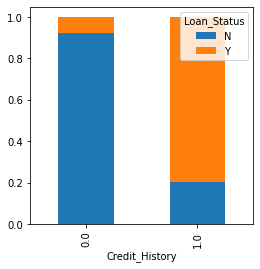

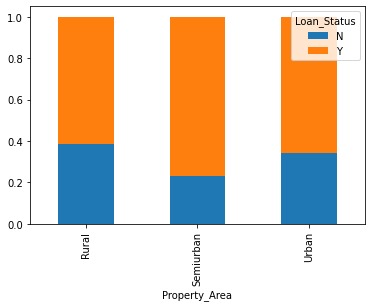

In [21]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 

Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) 
plt.show()

- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

### Now let’s visualize numerical independent variables with respect to target variable.

#### Numerical Independent Variable vs Target Variable

**We will try to find the mean income of people for which the loan has been approved vs the mean
income of people for which the loan has not been approved.**

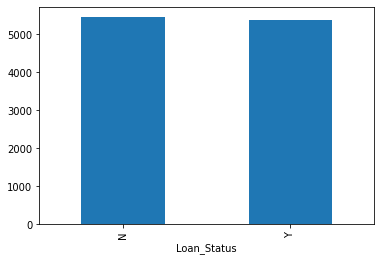

In [22]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean
income. So, let’s make bins for the applicant income variable based on the values in it and analyze
the corresponding loan status for each bin.

**It can be inferred that Applicant income does not affect the chances of loan approval which
contradicts our hypothesis in which we assumed that if the applicant income is high the chances
of loan approval will also be high.**

**We will analyze the coapplicant income and loan amount variable in similar manner.** 

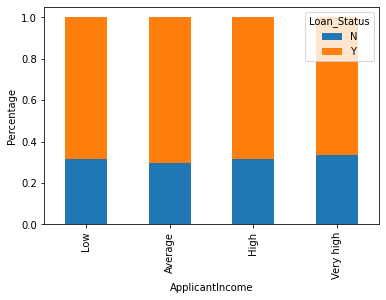

In [23]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']

train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

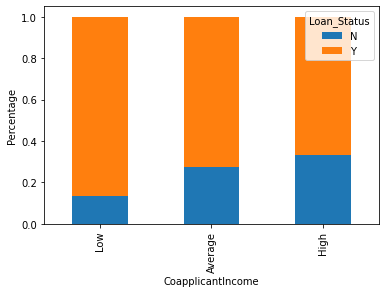

In [24]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']

train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

**Conclusions:-**
It shows that if coapplicant’s income is less the chances of loan approval are high. But this does
not look right. The possible reason behind this may be that most of the applicants don’t have any
coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not
dependent on it. So we can make a new variable in which we will combine the applicant’s and
coapplicant’s income to visualize the combined effect of income on loan approval.

**Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status**

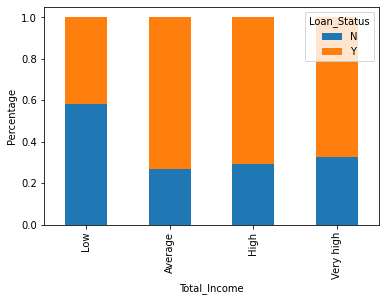

In [25]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']

train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is
very less as compared to that of applicants with Average, High and Very High Income.

#### Let’s visualize the Loan amount variable.

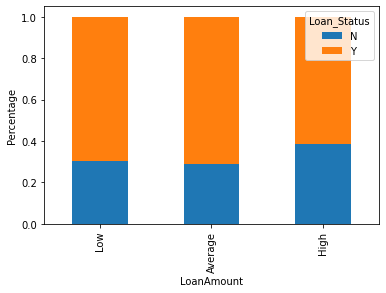

In [26]:
bins=[0,100,200,700] 
group=['Low','Average','High']

train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),
axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount
as compared to that of High Loan Amount which supports our hypothesis in which we
considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in
dependents variable to 3 to make it a numerical variable.We will also convert the target
variable’s categories into 0 and 1 so that we can find its correlation with numerical variables.
One more reason to do so is few models like logistic regression takes only numeric values as
input. We will replace N with 0 and Y with 1.

In [27]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin',
                  'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to
visualize the correlation. Heatmaps visualize data through variations in coloring. The variables
with darker color means their correlation is more.

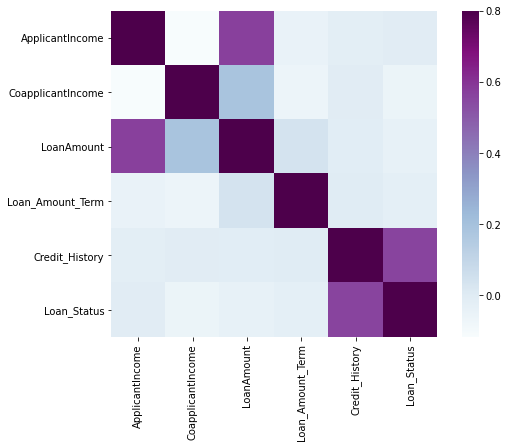

In [28]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

**We see that the most correlated variables are (ApplicantIncome - LoanAmount) and
(Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.**

After exploring all the variables in our data, we can now impute the missing values and treat the
outliers because missing data and outliers can have adverse effect on the model performance.
Missing value imputation

## Missing Value and Outlier Treatments

### Missing value imputation

**Let’s list out feature-wise count of missing values.**

In [29]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:
- **For numerical variables:** imputation using mean or median
- **For categorical variables:** imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and
Self_Employed features so we can fill them using the mode of the features.

In [30]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the
value count of the Loan amount term variable

In [31]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we
will replace the missing values in this variable using the mode of this variable.

In [32]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or
median to impute the missing values. We will use median to fill the null values as earlier we saw
that loan amount have outliers so the mean will not be the proper approach as it is highly
affected by the presence of outliers.

In [33]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [34]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the train dataset. Let’s fill all the
missing values in the test dataset too with the same approach.

In [35]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [36]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Treatment

**As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them
as the presence of outliers affects the distribution of the data.**

having outliers often has a significant effect on the mean and standard
deviation and hence affecting the distribution. We must take steps to remove outliers from our
data sets.
Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer.
This is called right skewness. One way to remove the skewness is by doing the log
transformation. As we take the log transformation, it does not affect the smaller values much,
but reduces the larger values. So, we get a distribution similar to normal distribution.
Let’s visualize the effect of log transformation. We will do the similar changes to the test file
simultaneously.

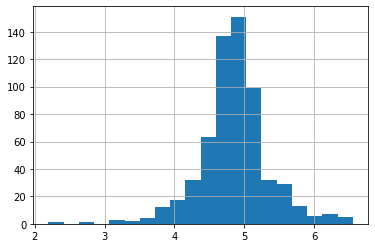

In [37]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

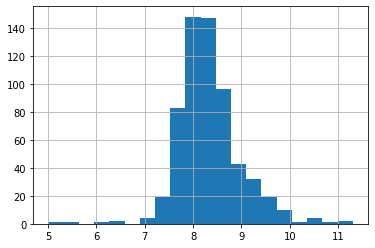

In [38]:
train['ApplicantIncome_log'] = np.log(train['ApplicantIncome']+.01)
train['ApplicantIncome_log'].hist(bins=20) 
test['ApplicantIncome_log'] = np.log(test['ApplicantIncome']+.01)

Now the distribution looks much closer to normal and effect of extreme values has been
significantly subsided. Let’s build a logistic regression model and make predictions for the test
dataset.

In [39]:
train.drop(['LoanAmount','ApplicantIncome'],1)
test.drop(['LoanAmount','ApplicantIncome'],1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log
0,LP001015,Male,Yes,0,Graduate,No,0,360.0,1.0,Urban,4.70,8.65
1,LP001022,Male,Yes,1,Graduate,No,1500,360.0,1.0,Urban,4.84,8.03
2,LP001031,Male,Yes,2,Graduate,No,1800,360.0,1.0,Urban,5.34,8.52
3,LP001035,Male,Yes,2,Graduate,No,2546,360.0,1.0,Urban,4.61,7.76
4,LP001051,Male,No,0,Not Graduate,No,0,360.0,1.0,Urban,4.36,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,1777,360.0,1.0,Urban,4.73,8.30
363,LP002975,Male,Yes,0,Graduate,No,709,360.0,1.0,Urban,4.74,8.33
364,LP002980,Male,No,0,Graduate,No,1993,360.0,1.0,Semiurban,4.84,8.09
365,LP002986,Male,Yes,0,Graduate,No,2393,360.0,1.0,Rural,5.06,8.52


### Model Building 

**Let us make our first model to predict the target variable. We will start with Logistic Regression
which is used for predicting binary outcome.**
- Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 /
0, Yes / No, True / False) given a set of independent variables.
- Logistic regression is an estimation of Logit function. Logit function is simply a log of odds
in favor of the event.
- This function creates a s-shaped curve with the probability estimate, which is very similar
to the required step wise function

**Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the
same changes to the test dataset which we did for the training dataset.**

In [40]:
train.drop('Loan_ID',axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)

We will use scikit-learn (sklearn) for making different models which is an open source library for
Python. It is one of the most efficient tool which contains many inbuilt functions that can be used
for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable
from the train dataset and save it in another dataset.

In [41]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns
categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let
us understand the process of dummies first:

In [42]:
X = pd.get_dummies(X,drop_first=True)
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

Now we will train the model on training dataset and make predictions for the test dataset. But
can we validate these predictions? One way of doing this is we can divide our train dataset into
two parts: train and validation. We can train the model on this train part and using that make
predictions for the validation part. In this way we can validate our predictions as we have the
true predictions for the validation part (which we do not have for the test dataset).
We will use the train_test_split function from sklearn to divide our train dataset. So, first let us
import train_test_split.

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression
and accuracy_score from sklearn and fit the logistic regression model.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [45]:
pred_cv = model.predict(x_cv)

Let us calculate how accurate our predictions are by calculating the accuracy.

In [46]:
accuracy_score(y_cv,pred_cv)

0.8324324324324325

In [47]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [48]:
pred_test = model.predict(test)

In [49]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

In [50]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [51]:
pd.DataFrame(submission, columns=
['Loan_ID','Loan_Status']).to_csv('logistic.csv')

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status
correctly.

**Based on the domain knowledge, we can come up with new features that might affect the target
variable. We will create the following three new features**

- Total Income - As discussed during bivariate analysis we will combine the Applicant
Income and Coapplicant Income. If the total income is high, chances of loan approval might
also be high.
- EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind
making this variable is that people who have high EMI’s might find it difficult to pay back
the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan
amount term.
- Balance Income - This is the income left after the EMI has been paid. Idea behind creating
this variable is that if this value is high, the chances are high that a person will repay the
loan and hence increasing the chances of loan approval.

In [52]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

#### Let’s check the distribution of Total Income.

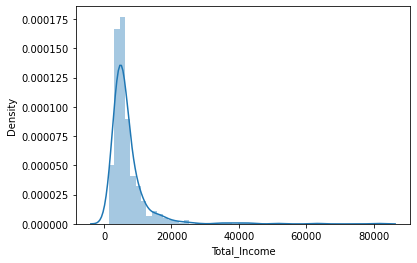

In [53]:
sns.distplot(train['Total_Income']);

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log
transformation to make the distribution normal.

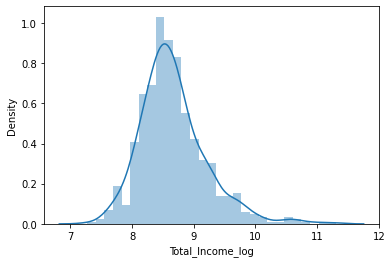

In [54]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been
significantly subsided. Let’s create the EMI feature now.

In [55]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

Let’s check the distribution of EMI variable.

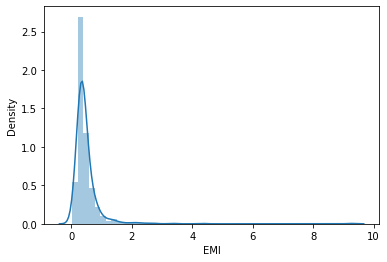

In [56]:
sns.distplot(train['EMI'])
plt.show()

Let us create Balance Income feature now and check its distribution.

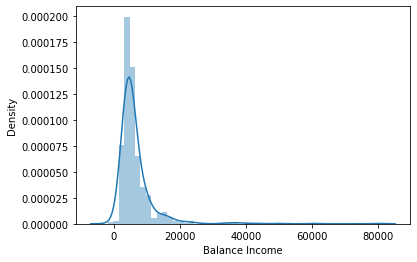

In [57]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000) #Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

Let us now drop the variables which we used to create these new features. Reason for doing this
is, the correlation between those old features and these new features will be very high and
logistic regression assumes that the variables are not highly correlated. We also wants to
remove the noise from the dataset, so removing correlated features will help in reducing the
noise too.

In [58]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'], axis=1)

In [59]:
train

,Credit_History,Loan_Status,LoanAmount_log,ApplicantIncome_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,4.85,8.67,1,0,1,0,0,0,0,0,1,5849.0,8.67,0.36,5493.44
1,1.0,0,4.85,8.43,1,1,0,1,0,0,0,0,0,6091.0,8.71,0.36,5735.44
2,1.0,1,4.19,8.01,1,1,1,0,0,0,1,0,1,3000.0,8.01,0.18,2816.67
3,1.0,1,4.79,7.86,1,1,1,0,0,1,0,0,1,4941.0,8.51,0.33,4607.67
4,1.0,1,4.95,8.70,1,0,1,0,0,0,0,0,1,6000.0,8.70,0.39,5608.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1,4.26,7.97,0,0,1,0,0,0,0,0,0,2900.0,7.97,0.20,2702.78
610,1.0,1,3.69,8.32,1,1,0,0,0,0,0,0,0,4106.0,8.32,0.22,3883.78
611,1.0,1,5.53,9.00,1,1,0,1,0,0,0,0,1,8312.0,9.03,0.70,7609.22
612,1.0,1,5.23,8.93,1,1,0,0,1,0,0,0,1,7583.0,8.93,0.52,7063.56


### Model Building - II

After creating new features, we can continue the model building process. So we will start with
logistic regression model and then move over to more complex models like RandomForest and
XGBoost.
We will build the following models in this section.
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

Let’s prepare the data for feeding into the models.

### Logistic Regression

In [61]:
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]    
    ytr,yvl = y[train_index],y[test_index]        
    model = LogisticRegression(random_state=1)    
    model.fit(xtr, ytr)    
    pred_test = model.predict(xvl)    
    score = accuracy_score(yvl,pred_test)    
    print('accuracy_score',score)    
    i+=1
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7786885245901639


## Decision Tree

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable)
that is mostly used in classification problems. In this technique, we split the population or sample
into two or more homogeneous sets(or sub-populations) based on most significant splitter /
differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The
creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can
say that purity of the node increases with respect to the target variable.

In [62]:
from sklearn import tree

Let’s fit the decision tree model with 5 folds of cross validation.

In [63]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]    
    ytr,yvl = y[train_index],y[test_index]        
    model = tree.DecisionTreeClassifier(random_state=1)    
    model.fit(xtr, ytr)    
    pred_test = model.predict(xvl)    
    score = accuracy_score(yvl,pred_test)    
    print('accuracy_score',score)    
    i+=1
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7154471544715447

2 of kfold 5
accuracy_score 0.7235772357723578

3 of kfold 5
accuracy_score 0.7235772357723578

4 of kfold 5
accuracy_score 0.7235772357723578

5 of kfold 5
accuracy_score 0.6557377049180327


We got an accuracy of 0.63 which is much lesser than the accuracy from logistic regression
model. So let’s build another model, i.e. Random Forest, a tree based ensemble algorithm and try
to improve our model by improving the accuracy.

### Random Forest

- RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak
learners (decision trees) are combined to make a powerful prediction model.
- For every individual learner, a random sample of rows and a few randomly chosen variables
are used to build a decision tree model.
- Final prediction can be a function of all the predictions made by the individual learners.
- In case of regression problem, the final prediction can be mean of all the predictions.

In [64]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]    
    ytr,yvl = y[train_index],y[test_index]        
    model = RandomForestClassifier(random_state=1, max_depth=10)    
    model.fit(xtr, ytr)    
    pred_test = model.predict(xvl)    
    score = accuracy_score(yvl,pred_test)    
    print('accuracy_score',score)    
    i+=1 


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7868852459016393


The mean validation accuracy for this model is 0.766

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use
grid search to get the optimized values of hyper parameters. Grid-search is a way to select the
best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum
depth of the tree and n_estimators decides the number of trees that will be used in random
forest model.

In [65]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and
# from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators':list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3,random_state=1)

# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [66]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=61, random_state=1)

So, the optimized value for the max_depth variable is 7 and for n_estimator is 41. Now let’s build
the model using these optimized values.

In [67]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]    
    ytr,yvl = y[train_index],y[test_index]        
    model = RandomForestClassifier(random_state=1, max_depth=7, n_estimators=41)     
    model.fit(xtr, ytr)    
    pred_test = model.predict(xvl)    
    score = accuracy_score(yvl,pred_test)    
    print('accuracy_score',score)    
    i+=1
    pred_test = model.predict(test)
    pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.8032786885245902


We got an accuracy of 0.7638 from the random forest model on leaderboard.
Let us find the feature importance now, i.e. which features are most important for this problem.
We will use feature_importances_ attribute of sklearn to do so.

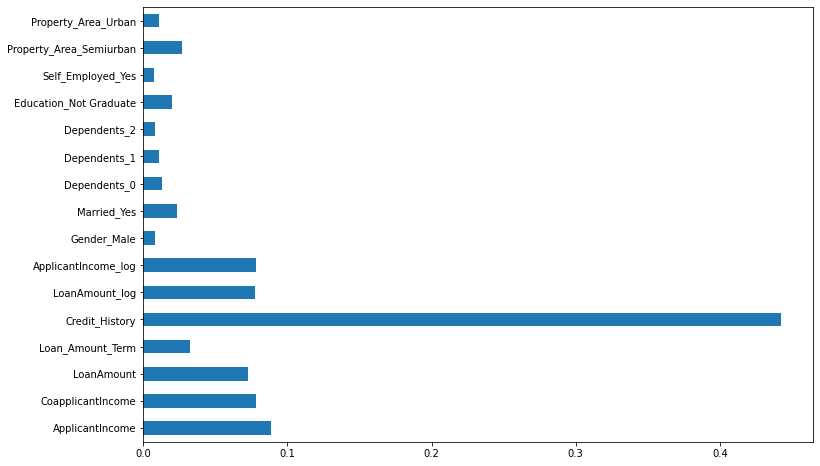

In [68]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()

We can see that Credit_History is the most important feature followed by Balance Income, Total
Income, EMI. So, feature engineering helped us in predicting our target variable.

### XGBOOST

XGBoost is a fast and efficient algorithm and has been used to by the winners of many data
science competitions. It’s a boosting algorithm.

XGBoost works only with numeric variables and we have already replaced the categorical
variables with numeric variables. Let’s have a look at the parameters that we are going to use in
our model.
- n_estimator: This specifies the number of trees for the model.
- max_depth: We can specify maximum depth of a tree using this parameter.

In [71]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]    
    ytr,yvl = y[train_index],y[test_index]        
    model = XGBClassifier(n_estimators=50, max_depth=4,eval_metric='mlogloss')    
    model.fit(xtr, ytr)    
    pred_test = model.predict(xvl)    
    score = accuracy_score(yvl,pred_test)    
    print('accuracy_score',score)    
    i+=1
    pred_test = model.predict(test) 
    pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8048780487804879

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7723577235772358

5 of kfold 5
accuracy_score 0.7540983606557377


**There are still quite a many things that can be tried to improve our models’ predictions. We
create and add more variables, try different models with different subset of features and/or
rows, etc.**

## Thank you for your time and consideration